In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom as binom, hypergeom as hyp, poisson as poisson
from scipy.special import comb
import scipy.optimize
import time

<b>1.</b>
    
*Método  de  Monte  Carlo  (aceptación-rechazo)*

Para generar números pseudoaleatorios con una distribución arbitraria $f(t)$, en un dominio $[a,b]$ en el que $f$ esté acotada (siendo $f_m$ su valor máximo) se puede procederde la siguiente manera:

**I.**  Se generan dos números al azar $y$ y $z$ con distribución uniforme en $[0,1]$.

**II.**  A partir de $y$ y $z$ se determinan $u=a+ (b−a)y$ y $v=f_m z$.

**III.**  Si $v≤f(u)$, se incluye $x=u$ en la muestra de números generados, en otro caso se descarta.

**IV.**  Se repiten los pasos **I-III** hasta obtener la cantidad deseada de números aceptados.

(a) Utilizando el resultado del problema 5, genere con la computadora 10000 números al azar que sigan la distribución de Cauchy a partir de una uniforme $[0,1]$. Presente los datos en un histograma y grafique sobre éstos la predicción teórica.

(b) Repita el ítem anterior pero ahora usando el Método Monte Carlo descripto inicialmente.

(c) Discuta los pros y contras de cada método.

<b> (a)</b>
En el problema 5 se plantea encontrar un cambio de variables el cual tenga distribución de Cauchy a partir de una uniforme.

El cambio de variables correspondiente es:

$X = \beta - tan(\theta) \alpha$,

con $\theta$ una variable con distribución uniforme entre $[-\frac{\pi}{2},\frac{\pi}{2}]$, $ \beta $ y $\alpha$ dos parámetros reales que fijan los contornos de la distribución de Cauchy.

Entonces, a partir de esta variable, nos armamos 10000 números al azar siguiendo esta distribución.

In [2]:
#Coloco mis parámetros

n=10000 # cantidad de números al azar

alpha=1 # Estos números no modifican la forma de la distribución así que los elijo trivialmente
beta=0

#Armo la distribución uniforme:
t= (np.random.random(n)-1/2)*np.pi #Me genera un array de números aleatorios entre el [-pi/2,pi/2] con dist uniforme

#Defino mi variable aleatoria que tendrá distribución de Cauchy:
def f(alpha,beta,t):
    return beta-np.tan(t)*alpha

#Me genero un array de 10000 números aleatorios con distribución de Cauchy
vf=np.vectorize(f)

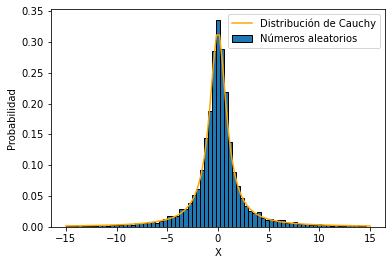

--- 0.36080193519592285 segundos ---


In [3]:
#Grafico el histograma dado por los 10000 números aleatorios y la distribución teórica.

x=np.linspace(-15,15,100)
cauchy= (1/np.pi)*(alpha/(alpha**2+(x-beta)**2)) #Distribución de Cauchy teórica.
start_time=time.time()
plt.hist(vf(alpha,beta,t),bins=np.arange(-15,15,0.4),rwidth=1,align="mid",ec="k",density = True,label="Números aleatorios")
plt.plot(x,cauchy,color="orange",label="Distribución de Cauchy")
plt.ylabel("Probabilidad")
plt.xlabel("X")
plt.legend()
plt.show()
print("--- %s segundos ---" % (time.time() - start_time))

Vemos que coinciden.

<b> (b)</b>

Ahora genero la distribución de Cauchy a partir del método de Monte Carlo siguiendo los pasos.


In [4]:
# Me armo la función que toma como varibles f: la distribución arbitraria; a,b: marcan el rango del dominio; n: cantidad de números aleatorios.

def MonteCarlo(f,a,b,n):
    
    #Me armo un array vacío en el cual voy a colocar los números aleatorios
    vector=np.zeros(0) 
    
    fmax=scipy.optimize.fminbound(lambda x: -f(x),a,b) #Esto me busca el valor de x para el cual f(x) es máxima.
    
    for i in range(n): # Esto corresponde con los pasos I y III repetidos de forma tal que obtenga los n números deseados.
            
            #le doy valores iniciales a las variables u y v.
            u=0
            v=f(fmax)+1 #Acá el valor inicial lo elijo para que sea mayor al máximo de f(x).
            
            while v>f(u): #Pongo la condición del paso III.
                u=a+(b-a)*np.random.random()
                v=f(fmax)*np.random.random()
            if v<=f(u):
                vector = np.append(vector,u)
                
    return vector # Este array contiene los n números aleatorios elegidos mediante el paso III.

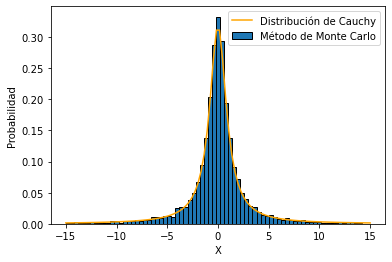

--- 0.8594326972961426 segundos ---


In [5]:
n=10000 #Cantidad de números aleatorios.
Cauchy = lambda x: (1/np.pi)*(alpha/(alpha**2+(x-beta)**2)) #distribución de Cauchy que irá como parámetro en la función definida para el método de Monte Carlo.

#Ploteo
start_time = time.time()
plt.hist(MonteCarlo(Cauchy,-15,15,n),bins=np.arange(-15,15,0.4),rwidth=1,align="mid",ec="k",density = True,label="Método de Monte Carlo")
plt.plot(x,cauchy,color="orange",label="Distribución de Cauchy")
plt.ylabel("Probabilidad")
plt.xlabel("X")
plt.legend()
plt.show()
print("--- %s segundos ---" % (time.time() - start_time))

Nuevamente coinciden.

<b>(c)<b/>

Vemos que con ambos métodos pudimos generar números al azar que siguen una distribución de Cauchy. Primero notamos la diferencia en los tiempos de cómputo, el método del inciso **(a)** es más rápido que el de Monte Carlo. Otra diferencia es que para el inciso **(a)** solo es útil si se conoce el cambio de variables necesario para generar la distribución que se desea, en cambio para el método de Monte Carlo solo se necesita la distribución y no hace falta saber que forma tienen las variables involucradas, lo que lo hace bastante útil ya que en ocaciones encontrar el cambio de variables necesario puede ser muy complicado.

<b>2.</b>  

En  el  problema  7  de  la  guía  vimos  que  si $X$ es  una  variable  aleatoria  con  distribución  uniforme  en  $[0,1]$ entonces $Y=e^X$ tiene distribución $f_Y(t) = 1/t , 1≤t≤e$.  Y quedó planteada la pregunta ¿Cómo haría para generar números al azar con distribución exponencial?. Impleméntelo en la computadora, construya un histograma con 500 números generados y dibuje sobre éste la distribución teórica.  Use $λ= 0.25$.  Hacer esto para dos dos histogramas:  uno con bines de igual ancho entodo el rango (un ancho apropiado para resolver la forma de la distribución) y otro con bines más gruesos apartir de $Y≥15$. ¿Cómo debe escalear la altura de los bines para que se superponga con la distribución?.

Nosotros queremos una variable aleatoria que siga una distribución exponencial generada a partir de otra variable aleatoria con distribución uniforme entre $[0,1]$. Para ello proponemos:

$Y = -\frac{log(X)}{\lambda}$,

siendo X la variable con distribución uniforme entre $[0,1]$. Con esto notamos que 

$f_X(x)\ dx = f_Y(y)\ dy$

$f_Y(y) = |\frac{dx}{dy}|$, con $f_X(x) = 1$.

Podemos invertir las variables tal que

$X = e^{-\lambda Y}$, 

entonces

$f_y(y) = \lambda e^{-\lambda y}$ $\rightarrow$ *Distribución exponencial*

Armamos el código.

In [6]:
N=500 #Cantidad de números aleatorios.
l=0.25 #Valor de lambda.
x=np.random.random(N) #Me generos los N números con distribución uniforme.

#Defino la variable Y.
def Y(x,l):
    return -np.log(x)/l
vY=np.vectorize(Y)

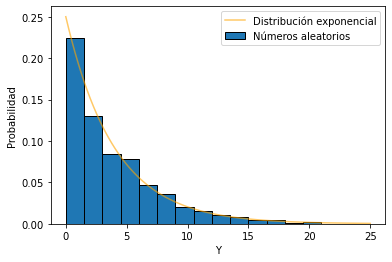

In [7]:
#Me armo la distribución exponencial teórica.
t=np.linspace(0,25,100)
exponencial= l*np.exp(-l*t)

#Ploteo el histograma con los bins de mismo ancho y la distribución teórica.
plt.hist(vY(x,l),bins=np.arange(0,25,1.5),rwidth=1,align="mid",ec="k",density = True,label="Números aleatorios")
plt.plot(t,exponencial,color="orange",label="Distribución exponencial",alpha=0.6)
plt.ylabel("Probabilidad")
plt.xlabel("Y")
plt.legend()
plt.show()

Se puede apreciar que con ancho de bin igual a 1 la distribución que siguen los números aleatorios parece ser exponencial.

Ahora gráficamos el histograma con ancho de bin igual a 1 hasta $Y=15$, luego para $Y>15$ con ancho igual a 3.

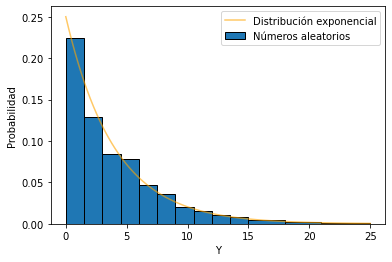

In [8]:
plt.hist(vY(x,l),bins=[0,1.5,3,4.5,6,7.5,9,10.5,12,13.5,15,18,21,25],rwidth=1,align="mid",ec="k",density = True,label="Números aleatorios")
plt.plot(t,exponencial,color="orange",label="Distribución exponencial",alpha=0.6)
plt.ylabel("Probabilidad")
plt.xlabel("Y")
plt.legend()
plt.show()

En este caso, para normalizar el histograma ya no vale simplemente dividir por el número total de casos de forma tal que la altura de los bins sumen 1, debido a que estos no tienen el mismo ancho. Ahora debemos dividir además por el ancho correspondiente de cada bin al normalizar para que se superponga correctamente con la distribución.